In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
data = pd.read_csv("fashion-mnist_test.csv")
x = data.values

print(x.shape)


(10000, 785)


In [5]:
X = x[:8000,1:]
y = x[:8000,0]
X = X/255.0
X = X.reshape((-1,28,28,1))
y = np_utils.to_categorical(y)
print (X.shape, y.shape)

(8000, 28, 28, 1) (8000, 10)


In [6]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

W0716 10:14:41.235950 140172531988224 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 10:14:41.497784 140172531988224 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 10:14:41.673593 140172531988224 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 10:14:41.794340 140172531988224 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0716 10:14:48.247169 140172531988224 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 10:14:48.275823 140172531988224 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
hist = model.fit(X,y, epochs=20, shuffle=True, batch_size=64, validation_split=0.20)

W0716 10:14:51.063487 140172531988224 deprecation.py:323] From /home/vinayak/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 6s 906us/step - loss: 1.1513 - acc: 0.5711 - val_loss: 0.8584 - val_acc: 0.7200
Epoch 2/20
6400/6400 [==============================] - 5s 753us/step - loss: 0.6655 - acc: 0.7438 - val_loss: 0.6654 - val_acc: 0.7775
Epoch 3/20
6400/6400 [==============================] - 5s 853us/step - loss: 0.5555 - acc: 0.7892 - val_loss: 0.5974 - val_acc: 0.7963
Epoch 4/20
6400/6400 [==============================] - 6s 901us/step - loss: 0.5083 - acc: 0.8030 - val_loss: 0.5665 - val_acc: 0.8075
Epoch 5/20
6400/6400 [==============================] - 6s 921us/step - loss: 0.4564 - acc: 0.8302 - val_loss: 0.5494 - val_acc: 0.8256
Epoch 6/20
6400/6400 [==============================] - 6s 929us/step - loss: 0.4192 - acc: 0.8438 - val_loss: 0.4981 - val_acc: 0.8300
Epoch 7/20
6400/6400 [==============================] - 6s 917us/step - loss: 0.3945 - acc: 0.8536 - val_loss: 0.4751 - val_acc: 0.8444


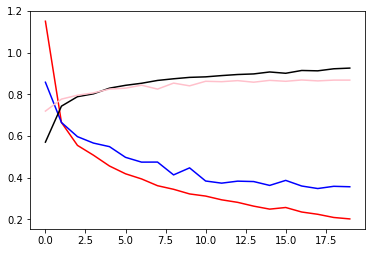

In [9]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.plot(hist.history['acc'], color='black')
plt.plot(hist.history['val_acc'], color='pink')
plt.show()

In [12]:
model.save('conv.h5')

## Using saved models

In [13]:
from keras.models import load_model

In [14]:
loaded_model = load_model("./conv.h5")

In [15]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

In [16]:
y = model.predict(X[:1000])

In [17]:
print (y.shape)

(1000, 10)
